##**Building a knowledge graph from the text scrapped from https://english.onlinekhabar.com/ articles**

In [6]:
from google.colab import drive     
drive.mount('/gdrive')          

Mounted at /gdrive


- HTML web scrapping using **BeautifulSoup(!pip3 install bs4) python library**.
- In order to work with the HTML, we will have to get the HTML as a string. We can easily get HTML data by using get() function in **requests module(!pip3 install requests)**.
- Once the HTML is fetched using requests the next step will be to **parse** the HTML content

In [7]:
#Installing modules
!pip3 install pandas requests BeautifulSoup4
!pip3 install requests
!pip3 install bs4
!pip3 install html5lib


##**Politics Articles Text**

In [108]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://english.onlinekhabar.com/cctv-cameras-not-in-all-vote-counting.html"
r = requests.get(url)

soup = BeautifulSoup(r.content, "html.parser")
information = soup.findAll(attrs = {"class":"post-content-wrap"})
politicsText  = information[0].text.replace('Kathmandu, May 11','').replace('Onlinekhabar','').replace('Wednesday May 11, 2022, 1:00 pm','').replace(',','')
print(politicsText)




The Election Commission says it wanted CCTV cameras in all 753 vote counting centres across the country for the local elections to be held this Friday but it did not become possible.
The commission says monitoring with the cameras would be possible in only around 300 places only as the local governments could not manage them.
“We couldn’t provide CCTV cameras on our own and some local governments said they could not do it either” Chief Election Commissioner Dinesh Kumar Thapaliya says. 
Further a lack of uninterrupted electricity and internet in some remote districts resulted in the problem according to him.
Whenever CCTV monitoring cannot be possible the officials will be asked to keep video records of the counting process so that they can be used whenever any dispute arises. 
Providing security to vote counting is considered a key challenge in Nepal’s election process as some ballot papers were torn by political cadres in Bharatpur of Chitwan in 2017.



















##**Business Articles Text**

In [109]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://english.onlinekhabar.com/restriction-luxury-imports-continue.html"
r = requests.get(url)

soup = BeautifulSoup(r.content, "html.parser")
information= soup.findAll(attrs = {"class":"post-content-wrap"})
businessText  = information[0].text.replace('Kathmandu, May 11','').replace('Onlinekhabar','').replace('Wednesday May 11, 2022, 12:01 pm','').replace(',','')
print(businessText)




Although the government says it has imposed a restriction on luxury imports until mid-July 2022 the end of the current fiscal year only officials say it is highly likely that the government will extend the restriction.
Moreover the new budget plan for the next fiscal year will embrace the restriction on luxury imports as a policy priority according to the officials.
Currently the Ministry of Finance is preparing the budget plan that it has to table in the House of Representatives on May 29 as per the constitutional provision. 
Officials say the government will also restrict agricultural products to push domestic producers for more yields.
“Whereas some goods will be banned for the import some will be taxable at a high rate” an official involved in the planning says.
The government is also preparing to restrict the import of petroleum products as they have been one of the biggest imports of the country.
 



















##**Lifestyle Articles Text**

In [110]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://english.onlinekhabar.com/stories-of-nepal.html"
r = requests.get(url)

soup = BeautifulSoup(r.content, "html.parser")
information= soup.findAll(attrs = {"class":"post-content-wrap"})
lifestyleText = information[0].text.replace('Prasun Sangroula','').replace('Sunday May 8, 2022, 9:12 am','').replace(',','')
print(lifestyleText)



No one could have thought that an alcoholic and drug user would turn out to be a prolific storyteller. But 41-year-old Jay Poudyal of Kathmandu is one such person who made it happen through Stories of Nepal.
Poudyal was at his school when he began drinking. He was in addiction for more than a decade after that. Then he with the help of his wife approached a rehabilitation centre for detoxification. He became sober after his stay in rehab. Then he wanted to lead a healthy lifestyle engaging in things which would make him happy.
In the meantime while he was looking for some inspiration he came across a US-based online platform which features stories of ordinary people. That platform fascinated him and encouraged him to initiate Stories of Nepal a social media account that features stories of rural people of Nepal. It became a motivating factor for him to lead an engaging and happy life as he could explore his long-lost passion for photography and listen to people’s stories.
Everyone has

##**Travel Articles Text**

In [112]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://english.onlinekhabar.com/2nd-international-airport-flights.html"
r = requests.get(url)

soup = BeautifulSoup(r.content, "html.parser")
information= soup.findAll(attrs = {"class":"post-content-wrap"})
travelText = information[0].text.replace('Kathmandu, May 11','').replace('Onlinekhabar','').replace('Wednesday May 11, 2022, 4:02 pm','').replace(',','')
print(travelText)




As scheduled previously Nepal’s second international airport will open next week on May 16. 
However you will have to wait around a month to experience regular international flights from and to the Gautam Buddha International Airport. 
Jazeera Airways an airline from Kuwait has already received a permit to conduct three flights between Bhairahawa and Kuwait City a week. However it will operate regular flights from June 12 only according to airport officials.
The airline says passengers need a certification of full-dose vaccination against Covid to board its flights. If they are not vaccinated they will have to show a negative report of the PCR test conducted within the last 72 hours.



















##**Save Scraped Text Data to CSV File**

In [113]:
with open("text.csv", "w") as f:
    f.write("Text")
    f.write(politicsText)
    f.write(businessText)
    f.write(lifestyleText)
    f.write(travelText)
 

##**Now Read CSV File**

In [13]:
data=pd.read_csv('/gdrive/My Drive/BeautifulSoup/text.csv', on_bad_lines='skip')

In [14]:
data.head()

,Text
0,The Election Commission says it wanted CCTV ca...
1,The commission says monitoring with the camera...
2,“We couldn’t provide CCTV cameras on our own a...
3,Further a lack of uninterrupted electricity an...
4,Whenever CCTV monitoring cannot be possible th...


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    42 non-null     object
dtypes: object(1)
memory usage: 464.0+ bytes


##**Data Cleaning**
* In this stage we have to remove all the insignificant words in the observation such as **stop words**(eg. etc).In this case there is a library provided by **nltk (natural language tool kit)**.

* **NLTK** is a powerful Python package that provides a set of diverse natural languages algorithms. It is free, opensource, easy to use, large community, and well documented. NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. 

* **NLTK** helps the computer to analysis, preprocess, and understand the written text.



* **A Regular Expression (RE)** in a programming language is a special text string used for describing a search pattern. It is extremely useful for extracting information from text such as code, files, log, spreadsheets or even documents.

* **Stopwords** provides multiple sources of stopwords, for use in text analysis and natural language processing.

In [16]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###**Stemming:**

* Stemming is also good practice as it involves reducing a word to its root form. For example **Flying** is a word and its **suffix** is **ing**, if we remove **ing** from **Flying** then we will get **base word or root** word which is **“Fly”.**

* **Tokenization** is the process by which a large quantity of text is divided into smaller parts called tokens. These tokens are very useful for finding patterns and are considered as a base step for stemming.

* **Tokenizers** divide strings into lists of substrings.



In [17]:
from nltk.stem.porter import PorterStemmer           #The program reduce a word to its root form.
from nltk.corpus import stopwords                    #The  program removes stop words from a piece of text.
from nltk.tokenize import word_tokenize              #Tokenizers divide strings into lists of substrings

ps=PorterStemmer() 

In [118]:
#Description of this code is written below in details.
stemmed_dataset=[]                               
for i in range(0,42):
    stemmed_array = data["Text"][i].split() 
    stemmed = [ps.stem(word) for word in stemmed_array if not word in set(stopwords.words("english"))]
    stemmed = " ".join(stemmed)
    stemmed_dataset.append(stemmed)
    
    
print(stemmed_dataset[0:5])

['the elect commiss say want cctv camera 753 vote count centr across countri local elect held friday becom possible.', 'the commiss say monitor camera would possibl around 300 place local govern could manag them.', '“we couldn’t provid cctv camera local govern said could either” chief elect commission dinesh kumar thapaliya says.', 'further lack uninterrupt electr internet remot district result problem accord him.', 'whenev cctv monitor cannot possibl offici ask keep video record count process use whenev disput arises.']


* Above it involves a code which specifies the range which is 0 to 42 records. 

* I then initialized the variable stemmed_array to be equal to a column ‘Text’. 

* The split function ensures that the sentence is broken down into a list of words.
*  The words are then stemmed by calling the object ‘ps’ from the function PorterStemmer and the word stemmed must not be in the stop word list.
*  Then the list of words is then joined back together using the join() function. 
* The sentence is now appended to the blank data set list that was initialized before the stemming process.



##**Build a Knowledge Graph from Text Data**

In [21]:
#Import Libraries
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [114]:
doc = nlp("The Election Commission says it wanted CCTV cameras in all 753 vote counting centres across the country for the local elections to be held this Friday but it did not become possible.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
Election ... compound
Commission ... nsubj
says ... ROOT
it ... nsubj
wanted ... ccomp
CCTV ... compound
cameras ... dobj
in ... prep
all ... det
753 ... nummod
vote ... compound
counting ... compound
centres ... pobj
across ... prep
the ... det
country ... pobj
for ... prep
the ... det
local ... amod
elections ... pobj
to ... aux
be ... auxpass
held ... relcl
this ... det
Friday ... npadvmod
but ... cc
it ... nsubj
did ... aux
not ... neg
become ... ROOT
possible ... acomp
. ... punct


In [26]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################

  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      


    ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [27]:
get_entities("The Election Commission says it wanted CCTV cameras in all 753 vote counting centres across the country for the local elections to be held this Friday but it did not become possible.")

['Friday vote counting it', 'local vote counting elections']

In [97]:
entity_pairs = []

for i in tqdm(stemmed_dataset):
  entity_pairs.append(get_entities(i))

100%|██████████| 42/42 [00:00<00:00, 88.26it/s]


In [98]:
entity_pairs[0:5]

[['cctv camera', 'local friday becom'],
 ['local  govern', 'them'],
 ['chief dinesh kumar thapaliya', ''],
 ['', 'uninterrupt problem him'],
 ['offici record count process', 'whenev disput']]

In [99]:
def get_relation(sent):
  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [100]:
get_relation("The Election Commission says it wanted CCTV cameras in all 753 vote counting centres across the country for the local elections to be held this Friday but it did not become possible.")

'become possible'

In [101]:
relations = [get_relation(i) for i in tqdm(data['Text'])]


100%|██████████| 42/42 [00:00<00:00, 76.86it/s]


In [102]:
pd.Series(relations).value_counts()[:42]

says                     7
is                       3
have                     2
say                      2
received                 2
preparing                2
Image                    2
has                      2
Serving                  1
Along with               1
become possible          1
tries                    1
Support from             1
collected                1
wants                    1
open next                1
website                  1
travelled to             1
missing                  1
tells                    1
feels                    1
became                   1
wanted                   1
embrace                  1
considered               1
asked                    1
lack of uninterrupted    1
operate regular          1
dtype: int64

In [103]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [104]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

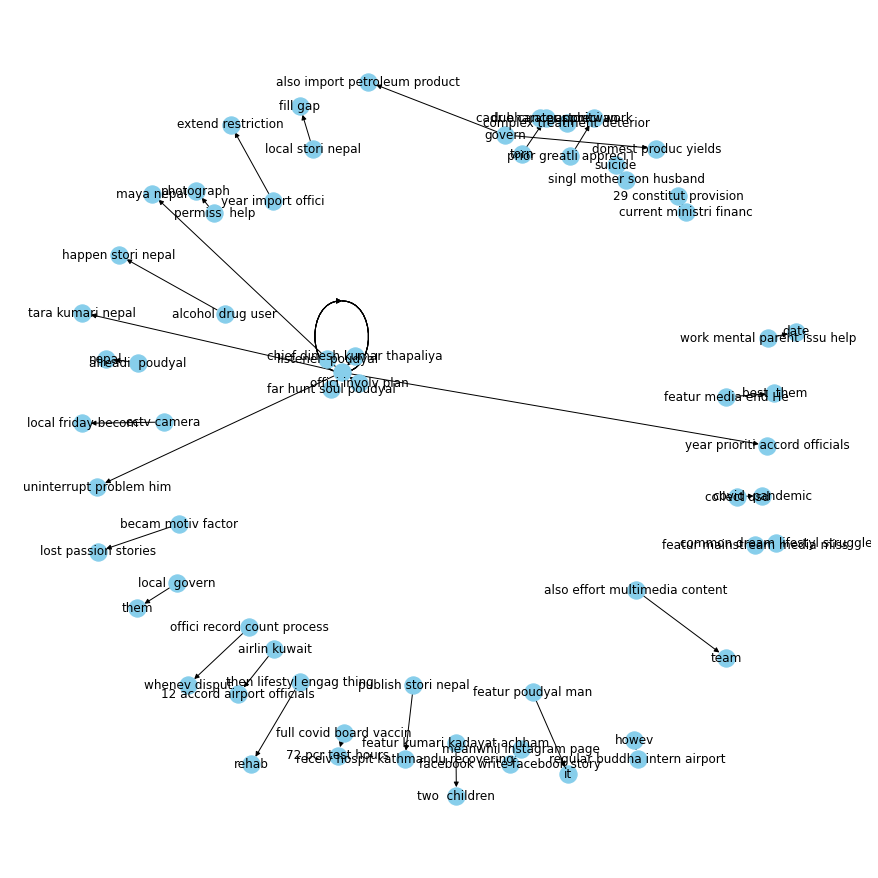

In [116]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()